In [14]:
#Repurposed from 2019 summer
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib
import matplotlib.pyplot as plt

In [15]:
NOAA = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\NOAA\sst.day.mean.PacCst.1981-2019.nc')

BCC_CSM_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\BCC-CSM_TEMPS\BS\BCC-CSM_BS_1966-2005_day_tg.nc")
BCC_CSM_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\BCC-CSM_TEMPS\RCP\BCC-CSM_RCP_2011-2050_day_tg.nc")

ACCESS_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\ACCESS_TEMPS\BS\ACCESS_BS_1966-2005_day_tg.nc")
ACCESS_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\ACCESS_TEMPS\RCP\ACCESS_RCP_2011-2050_day_tg.nc")

CCSM4_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CCSM4_TEMPS\BS\CCSM4_BS_1966-2005_day_tg.nc")
CCSM4_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CCSM4_TEMPS\RCP\CCSM4_RCP_2011-2050_day_tg.nc")

CMCC_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CMCC_TEMPS\BS\CMCC_BS_1966-2005_day_tg.nc")
CMCC_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\CMCC_TEMPS\RCP\CMCC_RCP_2011-2050_day_tg.nc")

FGOALS_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\FGOALS_TEMPS\BS\FGOALS_BS_1966-2005_day_tg.nc")
FGOALS_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\FGOALS_TEMPS\RCP\FGOALS_RCP_2011-2050_day_tg.nc")

GFDL_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\GFDL_TEMPS\BS\GFDL_BS_1966-2005_day_tg.nc")
GFDL_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\GFDL_TEMPS\RCP\GFDL_RCP_2011-2050_day_tg.nc")

IPSL_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\IPSL_TEMPS\BS\IPSL_BS_1966-2005_day_tg.nc")
IPSL_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\IPSL_TEMPS\RCP\IPSL_RCP_2011-2050_day_tg.nc")

MIROC5_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MIROC5_TEMPS\BS\MIROC5_BS_1966-2005_day_tg.nc")
MIROC5_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MIROC5_TEMPS\RCP\MIROC5_RCP_2011-2050_day_tg.nc")

MPI_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MPI_TEMPS\BS\MPI_BS_1966-2005_day_tg.nc")
MPI_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MPI_TEMPS\RCP\MPI_RCP_2011-2050_day_tg.nc")

MRI_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MRI_TEMPS\BS\MRI_BS_1966-2005_day_tg.nc")
MRI_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\MRI_TEMPS\RCP\MRI_RCP_2011-2050_day_tg.nc")

NorESM_BS = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\NorESM_TEMPS\BS\NorESM_BS_1966-2005_day_tg.nc")
NorESM_RCP = xr.open_dataset(r"D:\CRI_Modelling_PC\Netcdf Data\RegCM\NorESM_TEMPS\RCP\NorESM_RCP_2011-2050_day_tg.nc")

LandMask = xr.open_dataset(r'D:\CRI_Modelling_PC\Netcdf Data\mask_new.nc').mask

In [16]:
BS_list = [ACCESS_BS, BCC_CSM_BS, CCSM4_BS, CMCC_BS, FGOALS_BS, MIROC5_BS, MRI_BS, NorESM_BS]
RCP_list = [ACCESS_RCP, BCC_CSM_RCP, CCSM4_RCP, CMCC_RCP, FGOALS_RCP, MIROC5_RCP, MRI_RCP, NorESM_RCP]

In [17]:
lat = BCC_CSM_BS.xlat.data
lon = BCC_CSM_BS.xlon.data

In [18]:
min_Temp = 12
max_Temp = 20

In [10]:
"""for day in range(len(BS_list[0])):
    test = str(BS_list[0].time.data[day])[:4]
    if int(test) < 1982:
        BS_list[0].pop(day)
print(BS_list[0].time.data)"""
print(RCP_list[0])

#BS_list[0].delete(time=1966)

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 14245, x: 151, y: 200)
Coordinates:
    xlon       (y, x) float32 ...
    xlat       (y, x) float32 ...
  * time       (time) datetime64[ns] 2011-01-01T12:00:00 ... 2049-12-01
Dimensions without coordinates: bnds, x, y
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    tg         (time, y, x) float32 ...
Attributes:
    CDI:                                       Climate Data Interface version...
    Conventions:                               CF-1.4
    history:                                   Thu Jun 13 15:18:15 2019: cdo ...
    source:                                    RegCM Model Unversioned direct...
    institution:                               ICTP
    title:                                     ICTP Regional Climatic model V...
    references:                                http://eforge.escience-lab.org...
    experiment:                                ACCESS_US
    projection:                                LAM

In [19]:
average_BS_dict = {}
for model in range(len(BS_list)):
    BS_count = BS_list[model].tg[5855:].where((BS_list[model].tg[5855:]<=max_Temp) & (BS_list[model].tg[5855:]>=min_Temp)).groupby('time.year').count(dim='time')
    average_BS_dict[model]  = BS_count.mean(dim="year").where(LandMask==0)

average_RCP_dict = {}
for model in range(len(RCP_list)):
    RCP_count = RCP_list[model].tg[3659:].where((RCP_list[model].tg[3659:]<=max_Temp) & (RCP_list[model].tg[3659:]>=min_Temp)).groupby('time.year').count(dim='time')
    average_RCP_dict[model] = RCP_count.mean(dim="year").where(LandMask==0)

In [20]:
BS_sum = average_BS_dict[0]*0
for x in average_BS_dict.values():
    BS_sum += x.data
    
avg_BS = BS_sum/len(BS_list)
RCP_sum = average_RCP_dict[0]*0
for x in average_RCP_dict.values():
    RCP_sum += x.data
    
avg_RCP = RCP_sum/len(RCP_list)

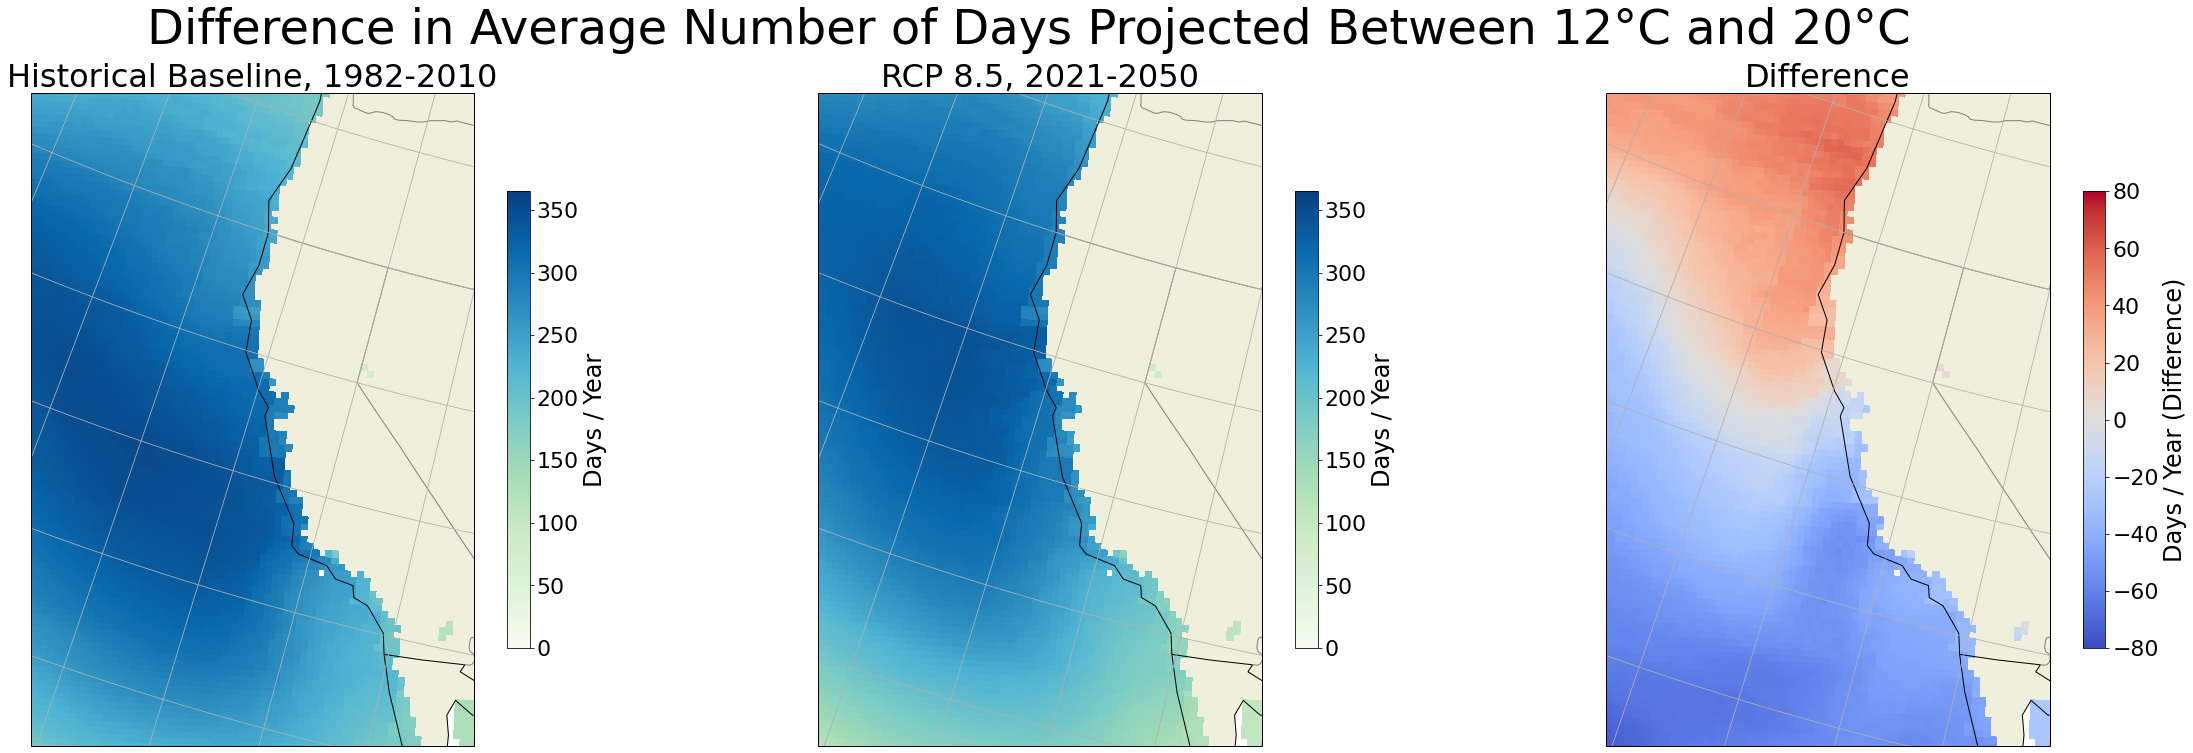

In [23]:

# Plotting is much the same as last time, starting with state lines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

fig2 = plt.figure(figsize=[40,12])
fig2.suptitle('Difference in Average Number of Days Projected Between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=48)

plotBS_avg = fig2.add_subplot(1,3,1,projection=crs.LambertConformal())
plotBS_avg.set_title('Historical Baseline, 1982-2010',fontsize=32)
plotBS_avg.set_extent([233,242,30,45], crs.Geodetic())
diff_cont_BS_avg = plotBS_avg.pcolormesh(lon, lat, avg_BS,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotBS_avg.add_feature(cfeature.COASTLINE)
plotBS_avg.add_feature(cfeature.LAND)
plotBS_avg.add_feature(cfeature.BORDERS)
plotBS_avg.add_feature(states_provinces, edgecolor='gray')
plotBS_avg.gridlines()

colorbar4 = fig2.colorbar(diff_cont_BS_avg, shrink=0.7, anchor=('SW'))
colorbar4.set_label('Days / Year',fontsize=24)
colorbar4.ax.tick_params(labelsize=22)

plotRCP_avg = fig2.add_subplot(1,3,2,projection=crs.LambertConformal())
plotRCP_avg.set_title('RCP 8.5, 2021-2050',fontsize=32)
plotRCP_avg.set_extent([233,242,30,45], crs.Geodetic())
diff_cont_RCP_avg = plotRCP_avg.pcolormesh(lon, lat, avg_RCP,
             transform=crs.PlateCarree(),
             cmap='GnBu',vmax=365,vmin=0)
plotRCP_avg.add_feature(cfeature.COASTLINE)
plotRCP_avg.add_feature(cfeature.LAND)
plotRCP_avg.add_feature(cfeature.BORDERS)
plotRCP_avg.add_feature(states_provinces, edgecolor='gray')
plotRCP_avg.gridlines()

colorbar5 = fig2.colorbar(diff_cont_RCP_avg, shrink=0.7, anchor=('SW'))
colorbar5.set_label('Days / Year',fontsize=24)
colorbar5.ax.tick_params(labelsize=22)


meandiffplot = fig2.add_subplot(1,3,3,projection=crs.LambertConformal())
meandiffplot.set_title('Difference',fontsize=32)
meandiffplot.set_extent([233,242,30,45], crs.Geodetic())
mean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,
             transform=crs.PlateCarree(),
             cmap='coolwarm',vmin=-80,vmax=80)
meandiffplot.add_feature(cfeature.COASTLINE)
meandiffplot.add_feature(cfeature.LAND)
meandiffplot.add_feature(cfeature.BORDERS)
meandiffplot.add_feature(states_provinces, edgecolor='gray')
meandiffplot.gridlines()

colorbar6 = fig2.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))
colorbar6.set_label('Days / Year (Difference)',fontsize=24)
colorbar6.ax.tick_params(labelsize=22)

fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Projected Number of Days 12-20.jpeg", bbox_inches='tight')

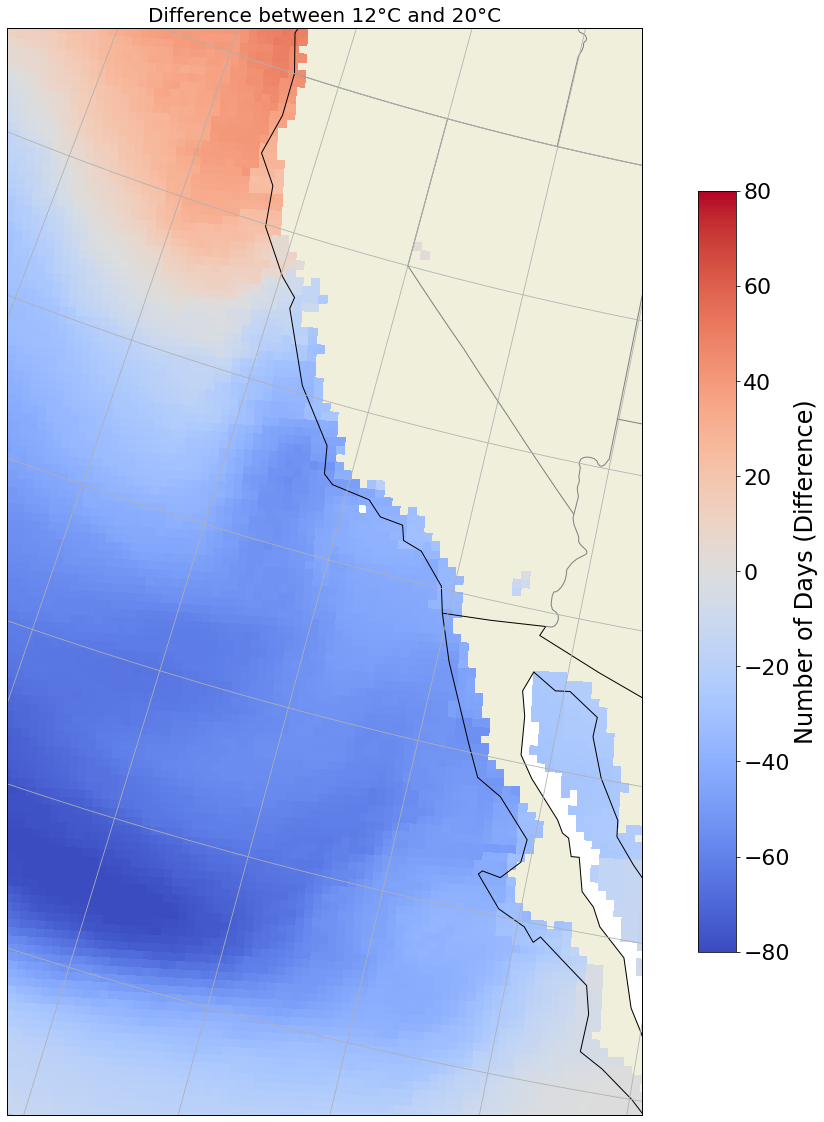

In [25]:
fig3 = plt.figure(figsize=[20,20])
#fig3.suptitle('Difference between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)

meandiffplot = fig3.add_subplot(1,1,1,projection=crs.LambertConformal())
meandiffplot.set_title('Difference between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)
meandiffplot.set_extent([236,245,23,43], crs.Geodetic())
mean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - 10,
             transform=crs.PlateCarree(),
             cmap='coolwarm',vmin=-80,vmax=80)
meandiffplot.add_feature(cfeature.COASTLINE)
meandiffplot.add_feature(cfeature.LAND)
meandiffplot.add_feature(cfeature.BORDERS)
meandiffplot.add_feature(states_provinces, edgecolor='gray')
meandiffplot.gridlines()
colorbar6 = fig3.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))
colorbar6.set_label('Number of Days (Difference)',fontsize=24)
colorbar6.ax.tick_params(labelsize=22)

fig3.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Difference map 12-20.jpeg", bbox_inches='tight')

In [97]:
"""min_Temp = 12
max_Temp = 24
average_BS_dict = {}
for model in range(len(BS_list)):
    BS_count = BS_list[model].tg.where((BS_list[model].tg<=max_Temp) & (BS_list[model].tg>=min_Temp)).groupby('time.year').count(dim='time')
    average_BS_dict[model]  = BS_count.mean(dim="year").where(LandMask==0)

average_RCP_dict = {}
for model in range(len(RCP_list)):
    RCP_count = RCP_list[model].tg.where((RCP_list[model].tg<=max_Temp) & (RCP_list[model].tg>=min_Temp)).groupby('time.year').count(dim='time')
    average_RCP_dict[model] = RCP_count.mean(dim="year").where(LandMask==0)
    
BS_sum = average_BS_dict[0]*0
for x in average_BS_dict.values():
    BS_sum += x.data
    
avg_BS = BS_sum/len(BS_list)
RCP_sum = average_RCP_dict[0]*0
for x in average_RCP_dict.values():
    RCP_sum += x.data
    
avg_RCP = RCP_sum/len(RCP_list)


# Plotting is much the same as last time, starting with state lines
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

fig2 = plt.figure(figsize=[40,12])
fig2.suptitle('Difference in Average Number of Days Projected Between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=48)

plotBS_avg = fig2.add_subplot(1,3,1,projection=crs.LambertConformal())
plotBS_avg.set_title('BS Observation Average: 1966-2005',fontsize=32)
plotBS_avg.set_extent([233,242,30,45], crs.Geodetic())
diff_cont_BS_avg = plotBS_avg.pcolormesh(lon, lat, avg_BS,
             transform=crs.PlateCarree(),
             cmap='jet',vmax=365,vmin=0)
plotBS_avg.add_feature(cfeature.COASTLINE)
plotBS_avg.add_feature(cfeature.LAND)
plotBS_avg.add_feature(cfeature.BORDERS)
plotBS_avg.add_feature(states_provinces, edgecolor='gray')
plotBS_avg.gridlines()

colorbar4 = fig2.colorbar(diff_cont_BS_avg, shrink=0.7, anchor=('SW'))
colorbar4.set_label('Number of Days',fontsize=24)
colorbar4.ax.tick_params(labelsize=22)

plotRCP_avg = fig2.add_subplot(1,3,2,projection=crs.LambertConformal())
plotRCP_avg.set_title('RCP Projection Average: 2011-2050',fontsize=32)
plotRCP_avg.set_extent([233,242,30,45], crs.Geodetic())
diff_cont_RCP_avg = plotRCP_avg.pcolormesh(lon, lat, avg_RCP,
             transform=crs.PlateCarree(),
             cmap='jet',vmax=365,vmin=0)
plotRCP_avg.add_feature(cfeature.COASTLINE)
plotRCP_avg.add_feature(cfeature.LAND)
plotRCP_avg.add_feature(cfeature.BORDERS)
plotRCP_avg.add_feature(states_provinces, edgecolor='gray')
plotRCP_avg.gridlines()

colorbar5 = fig2.colorbar(diff_cont_RCP_avg, shrink=0.7, anchor=('SW'))
colorbar5.set_label('Number of Days',fontsize=24)
colorbar5.ax.tick_params(labelsize=22)


meandiffplot = fig2.add_subplot(1,3,3,projection=crs.LambertConformal())
meandiffplot.set_title('Difference',fontsize=32)
meandiffplot.set_extent([233,242,30,45], crs.Geodetic())
mean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,
             transform=crs.PlateCarree(),
             cmap='coolwarm',vmin=-80,vmax=80)
meandiffplot.add_feature(cfeature.COASTLINE)
meandiffplot.add_feature(cfeature.LAND)
meandiffplot.add_feature(cfeature.BORDERS)
meandiffplot.add_feature(states_provinces, edgecolor='gray')
meandiffplot.gridlines()

colorbar6 = fig2.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))
colorbar6.set_label('Number of Days (Difference)',fontsize=24)
colorbar6.ax.tick_params(labelsize=22)

fig2.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Projected Number of Days 12-20.jpeg", bbox_inches='tight')"""

'min_Temp = 12\nmax_Temp = 24\naverage_BS_dict = {}\nfor model in range(len(BS_list)):\n    BS_count = BS_list[model].tg.where((BS_list[model].tg<=max_Temp) & (BS_list[model].tg>=min_Temp)).groupby(\'time.year\').count(dim=\'time\')\n    average_BS_dict[model]  = BS_count.mean(dim="year").where(LandMask==0)\n\naverage_RCP_dict = {}\nfor model in range(len(RCP_list)):\n    RCP_count = RCP_list[model].tg.where((RCP_list[model].tg<=max_Temp) & (RCP_list[model].tg>=min_Temp)).groupby(\'time.year\').count(dim=\'time\')\n    average_RCP_dict[model] = RCP_count.mean(dim="year").where(LandMask==0)\n    \nBS_sum = average_BS_dict[0]*0\nfor x in average_BS_dict.values():\n    BS_sum += x.data\n    \navg_BS = BS_sum/len(BS_list)\nRCP_sum = average_RCP_dict[0]*0\nfor x in average_RCP_dict.values():\n    RCP_sum += x.data\n    \navg_RCP = RCP_sum/len(RCP_list)\n\n\n# Plotting is much the same as last time, starting with state lines\nstates_provinces = cfeature.NaturalEarthFeature(\n        category

In [98]:
"""fig3 = plt.figure(figsize=[10,10])
fig3.suptitle('Difference between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)

meandiffplot = fig3.add_subplot(1,1,1,projection=crs.LambertConformal())
#meandiffplot.set_title('',fontsize=32)
meandiffplot.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
mean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,
             transform=crs.PlateCarree(),
             cmap='coolwarm',vmin=-80,vmax=80)
meandiffplot.add_feature(cfeature.COASTLINE)
meandiffplot.add_feature(cfeature.LAND)
meandiffplot.add_feature(cfeature.BORDERS)
meandiffplot.add_feature(states_provinces, edgecolor='gray')
meandiffplot.gridlines()
colorbar6 = fig3.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))
colorbar6.set_label('Number of Days (Difference)',fontsize=24)
colorbar6.ax.tick_params(labelsize=22)

fig3.savefig(r"D:\CRI_Modelling_PC\CRI Maps\HAB 2020\Difference map 12-20.jpeg", bbox_inches='tight')"""

'fig3 = plt.figure(figsize=[10,10])\nfig3.suptitle(\'Difference between \' + str(min_Temp) + \'°C and \' + str(max_Temp) + \'°C\', fontsize=20)\n\nmeandiffplot = fig3.add_subplot(1,1,1,projection=crs.LambertConformal())\n#meandiffplot.set_title(\'\',fontsize=32)\nmeandiffplot.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())\nmean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,\n             transform=crs.PlateCarree(),\n             cmap=\'coolwarm\',vmin=-80,vmax=80)\nmeandiffplot.add_feature(cfeature.COASTLINE)\nmeandiffplot.add_feature(cfeature.LAND)\nmeandiffplot.add_feature(cfeature.BORDERS)\nmeandiffplot.add_feature(states_provinces, edgecolor=\'gray\')\nmeandiffplot.gridlines()\ncolorbar6 = fig3.colorbar(mean_diff_cont, shrink=0.7, anchor=(\'SW\'))\ncolorbar6.set_label(\'Number of Days (Difference)\',fontsize=24)\ncolorbar6.ax.tick_params(labelsize=22)\n\nfig3.savefig(r"D:\\CRI_Modelling_PC\\CRI Maps\\HAB 2020\\Difference map 12-20.jpeg",

In [99]:
#Default difference code
'''
fig3 = plt.figure(figsize=[10,10])
fig3.suptitle('Average Projection - Average observation between ' + str(min_Temp) + '\u00b0C and ' + str(max_Temp) + '\u00b0C', fontsize=20)

meandiffplot = fig3.add_subplot(1,1,1,projection=crs.LambertConformal())
#meandiffplot.set_title('',fontsize=32)
meandiffplot.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())
mean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,
             transform=crs.PlateCarree(),
             cmap='coolwarm',vmin=-80,vmax=80)
meandiffplot.add_feature(cfeature.COASTLINE)
meandiffplot.add_feature(cfeature.LAND)
meandiffplot.add_feature(cfeature.BORDERS)
meandiffplot.add_feature(states_provinces, edgecolor='gray')
meandiffplot.gridlines()
colorbar6 = fig3.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))
colorbar6.set_label('Number of Days (Difference)',fontsize=24)
colorbar6.ax.tick_params(labelsize=22)
'''

"\nfig3 = plt.figure(figsize=[10,10])\nfig3.suptitle('Average Projection - Average observation between ' + str(min_Temp) + '°C and ' + str(max_Temp) + '°C', fontsize=20)\n\nmeandiffplot = fig3.add_subplot(1,1,1,projection=crs.LambertConformal())\n#meandiffplot.set_title('',fontsize=32)\nmeandiffplot.set_extent([lon[0,0], lon[-1,-1], lat[0, 0], lat[-1,-1]], crs.Geodetic())\nmean_diff_cont = meandiffplot.pcolormesh(lon, lat, avg_RCP - avg_BS,\n             transform=crs.PlateCarree(),\n             cmap='coolwarm',vmin=-80,vmax=80)\nmeandiffplot.add_feature(cfeature.COASTLINE)\nmeandiffplot.add_feature(cfeature.LAND)\nmeandiffplot.add_feature(cfeature.BORDERS)\nmeandiffplot.add_feature(states_provinces, edgecolor='gray')\nmeandiffplot.gridlines()\ncolorbar6 = fig3.colorbar(mean_diff_cont, shrink=0.7, anchor=('SW'))\ncolorbar6.set_label('Number of Days (Difference)',fontsize=24)\ncolorbar6.ax.tick_params(labelsize=22)\n"